# Tutorial 9: Extensional reactivation of continental margins

Romain Beucher, Peter Lovely, Amy L'Anson after (l'Anson et al. 2018)


![Model](./images/Tutorial_9.gif)

In [1]:
import UWGeodynamics as GEO
import glucifer

loaded rc file /workspace/user_data/UWGeodynamics/UWGeodynamics/uwgeo-data/uwgeodynamicsrc


In [2]:
u = GEO.UnitRegistry

## Scaling

In [3]:
half_rate = 1.5 * u.centimeter / u.year
model_length = 128e3 * u.meter
surfaceTemp = 293.15 * u.degK
baseModelTemp = 1573.15 * u.degK
bodyforce = 3395 * u.kilogram / u.metre**3 * 9.81 * u.meter / u.second**2

KL = model_length
Kt = KL / half_rate
KM = bodyforce * KL**2 * Kt**2
KT = (baseModelTemp - surfaceTemp)

GEO.scaling_coefficients["[length]"] = KL
GEO.scaling_coefficients["[time]"] = Kt
GEO.scaling_coefficients["[mass]"]= KM
GEO.scaling_coefficients["[temperature]"] = KT

### Model Setup (Figure from I'Anson et al., 2018)


![Setup](images/LAnson2018.png)

In [4]:
Model = GEO.Model(elementRes=(512, 256), 
                  minCoord=(0. * u.kilometer, -60. * u.kilometer), 
                  maxCoord=(128. * u.kilometer, 4. * u.kilometer), 
                  gravity=(0.0, -9.81 * u.meter / u.second**2))

In [5]:
Model.stressLimiter = 300 * u.megapascal

In [6]:
Model.mesh_advector(axis=0)

# Add some Materials

Now that we have our "universe" (box, sand pit) ready, we need to fill it with some materials.
The *geodynamics* module is designed around that idea of materials, which are essentially a way to define physical properties across the Model domain.

A material (or a phase) is first defined by the space it takes in the box (its shape).

In [7]:
Model.diffusivity = 1e-6 * u.metre**2 / u.second 
Model.capacity    = 1000. * u.joule / (u.kelvin * u.kilogram)

The Model we are building is essentially a layered cake. The geodynamics module provide and easy way to define a layer by defining shape as *layer* and specifying its *top* and *bottom*. The order is important: when 2 shapes overlay each other, only the second is used.

In [8]:
air = Model.add_material(name="Air", shape=GEO.shapes.Layer(top=Model.top, bottom=0.0 * u.kilometer))
Sediment1 = Model.add_material(name="Sediment1", shape=GEO.shapes.Layer(top=air.bottom, bottom= -1.0 * u.kilometer))
Sediment2 = Model.add_material(name="Sediment2", shape=GEO.shapes.Layer(top=Sediment1.bottom, bottom= -2.0 * u.kilometer))
Sediment3 = Model.add_material(name="Sediment3", shape=GEO.shapes.Layer(top=Sediment2.bottom, bottom= -3.0 * u.kilometer))
Sediment4 = Model.add_material(name="Sediment4", shape=GEO.shapes.Layer(top=Sediment3.bottom, bottom= -4.0 * u.kilometer))
Sediment5 = Model.add_material(name="Sediment5", shape=GEO.shapes.Layer(top=Sediment4.bottom, bottom= -5.0 * u.kilometer))
Sediment6 = Model.add_material(name="Sediment6", shape=GEO.shapes.Layer(top=Sediment5.bottom, bottom= -6.0 * u.kilometer))
Sediment7 = Model.add_material(name="Sediment7", shape=GEO.shapes.Layer(top=Sediment6.bottom, bottom= -7.0 * u.kilometer))
Sediment8 = Model.add_material(name="Sediment8", shape=GEO.shapes.Layer(top=Sediment7.bottom, bottom= -8.0 * u.kilometer))
Sediment9 = Model.add_material(name="Sediment9", shape=GEO.shapes.Layer(top=Sediment8.bottom, bottom= -9.0 * u.kilometer))
Basement1 = Model.add_material(name="Basement1", shape=GEO.shapes.Layer(top=Sediment9.bottom, bottom= -11.0 * u.kilometer))
Basement2 = Model.add_material(name="Basement2", shape=GEO.shapes.Layer(top=Basement1.bottom, bottom= -13.0 * u.kilometer))
Basement3 = Model.add_material(name="Basement3", shape=GEO.shapes.Layer(top=Basement2.bottom, bottom= -15.0 * u.kilometer))
Lowercrust = Model.add_material(name="LowerCrust", shape=GEO.shapes.Layer(top=Basement3.bottom, bottom=-25.0 * u.kilometer))
mantleLithosphere = Model.add_material(name="MantleLithosphere", shape=GEO.shapes.Layer(top=Lowercrust.bottom, bottom=-40.0 * u.kilometer))
mantle = Model.add_material(name="Mantle", shape=GEO.shapes.Layer(top=mantleLithosphere.bottom, bottom=Model.bottom))
sediment = Model.add_material(name="Sediment")

In [9]:
vertices1 = [(100.* u.kilometer, -2.0 * u.kilometer),
            (79.* u.kilometer, -23.0 * u.kilometer),
            (77.* u.kilometer, -23.0 * u.kilometer),
            (98.* u.kilometer, -2.0 * u.kilometer)]

fault = GEO.shapes.Polygon(vertices1)

fault = Model.add_material (name = "Fault", shape = fault)

In [10]:
vertices2 = [(100.* u.kilometer, -2.0 * u.kilometer),
            (128.* u.kilometer, -2.0 * u.kilometer),
            (128.* u.kilometer, -25.0 * u.kilometer),
            (77.* u.kilometer, -25.0 * u.kilometer)]

backstop = GEO.shapes.Polygon(vertices2)

backstop = Model.add_material (name = "Backstop", shape = backstop)


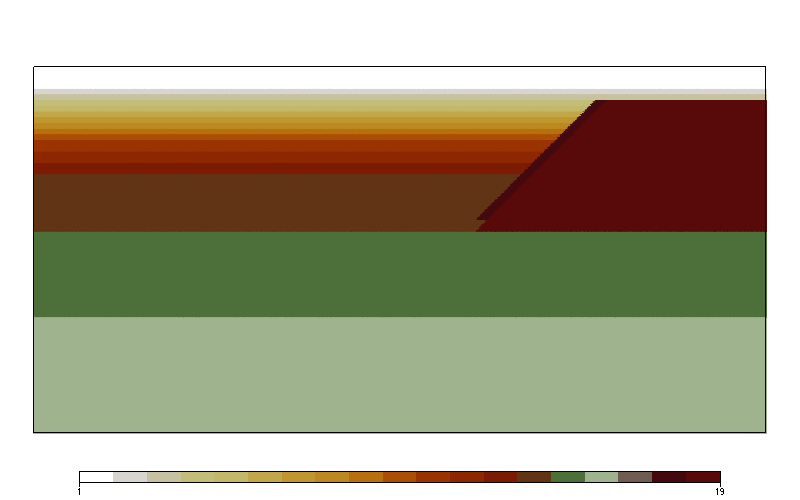

In [24]:
colours = """#ffffff #c8c5bb #c4bf7e #c3b768 #c09d35 #bd8b22
#b76709 #9d3800 #8c2701 #751605 #41652c #b2c4a2 #3c0911 #580909"""

Fig = glucifer.Figure(figsize=(800, 500))
Fig.Points(Model.swarm, Model.materialField, colours=colours, discrete=True, fn_size=3)
Fig.show()

In [ ]:
air.diffusivity = 1.0e-6 * u.metre**2 / u.second
air.capacity = 100. * u.joule / (u.kelvin * u.kilogram)

## Define Densities

In [16]:
air.density = 1. * u.kilogram / u.metre**3
Sediment1.density = GEO.LinearDensity(2000. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
Sediment2.density = GEO.LinearDensity(2050. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
Sediment3.density = GEO.LinearDensity(2100. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
Sediment4.density = GEO.LinearDensity(2150. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
Sediment5.density = GEO.LinearDensity(2200. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
Sediment6.density = GEO.LinearDensity(2250. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
Sediment7.density = GEO.LinearDensity(2300. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
Sediment8.density = GEO.LinearDensity(2350. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
Sediment9.density = GEO.LinearDensity(2400. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
Basement1.density = GEO.LinearDensity(2500. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
Basement2.density = GEO.LinearDensity(2600. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
Basement3.density = GEO.LinearDensity(2700. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
Lowercrust.density = GEO.LinearDensity(2800. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
backstop.density = GEO.LinearDensity(2800. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
fault.density = GEO.LinearDensity(2000. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
mantleLithosphere.density = GEO.LinearDensity(3370. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
mantle.density = GEO.LinearDensity(3395. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
sediment = GEO.LinearDensity(1900. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)


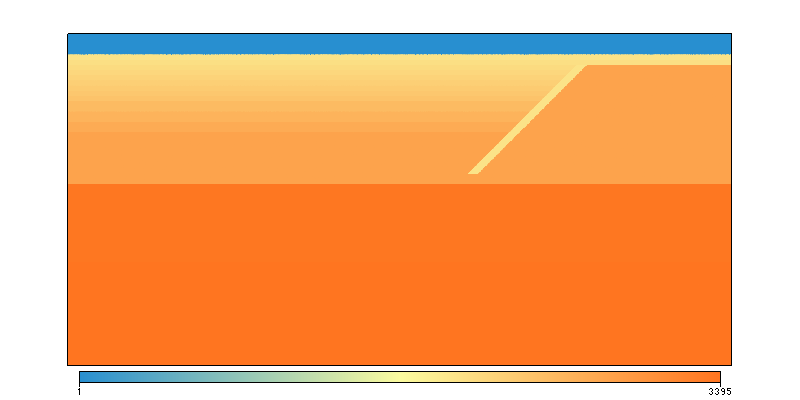

In [18]:
Fig = glucifer.Figure(figsize=(800,400))
Fig.Points(Model.swarm, GEO.Dimensionalize(Model.densityField, u.kilogram / u.metre**3))
Fig.show()

# Define Viscosities

The rheology library contains some commonly used rheologies stored in a python dictionary structure. We can list the keys defining the rheologies as follows:

In [19]:
Model.minViscosity = 1e18 * u.pascal * u.second
Model.maxViscosity = 5e23 * u.pascal * u.second

In [20]:
air.viscosity                = 1e18 * u.pascal * u.second
Sediment1.viscosity          = 1e22 * u.pascal * u.second
Sediment2.viscosity          = 1e22 * u.pascal * u.second
Sediment3.viscosity          = 1e22 * u.pascal * u.second
Sediment4.viscosity          = 1e22 * u.pascal * u.second
Sediment5.viscosity          = 1e22 * u.pascal * u.second
Sediment6.viscosity          = 1e22 * u.pascal * u.second
Sediment7.viscosity          = 1e22 * u.pascal * u.second
Sediment8.viscosity          = 1e22 * u.pascal * u.second
Sediment9.viscosity          = 1e22 * u.pascal * u.second
Basement1.viscosity          = 1e22 * u.pascal * u.second
Basement2.viscosity          = 1e22 * u.pascal * u.second
Basement3.viscosity          = 1e22 * u.pascal * u.second
Lowercrust.viscosity         = 5e21 * u.pascal * u.second
fault.viscosity              = 5e22 * u.pascal * u.second
backstop.viscosity           = 5e23 * u.pascal * u.second
mantleLithosphere.viscosity  = 1e22 * u.pascal * u.second
mantle.viscosity             = 5e20 * u.pascal * u.second
sediment.viscosity          = 1e21 * u.pascal * u.second

# Define Plasticity

Plastic behavior is assigned using the same approach as for viscosities.

In [22]:
pl = GEO.PlasticityRegistry()

In [25]:
Sediment1.plasticity = GEO.DruckerPrager(name="Sed1_plastic",
                                         cohesion=20. * u.megapascal,
                                         cohesionAfterSoftening=3. * u.megapascal,
                                         frictionCoefficient=0.567,
                                         frictionAfterSoftening=0.112,
                                         epsilon1=0.0, epsilon2=0.2)
Sediment2.plasticity = GEO.DruckerPrager(name="Sed2_plastic",
                                         cohesion=20. * u.megapascal,
                                         cohesionAfterSoftening=3. * u.megapascal,
                                         frictionCoefficient=0.567,
                                         frictionAfterSoftening=0.112,
                                         epsilon1=0.0, epsilon2=0.2)
Sediment3.plasticity = GEO.DruckerPrager(name="Sed3_plastic",
                                         cohesion=30. * u.megapascal,
                                         cohesionAfterSoftening=3. * u.megapascal,
                                         frictionCoefficient=0.567,
                                         frictionAfterSoftening=0.112,
                                         epsilon1=0.0, epsilon2=0.2)
Sediment4.plasticity = GEO.DruckerPrager(name="Sed4_plastic",
                                         cohesion=30. * u.megapascal,
                                         cohesionAfterSoftening=3. * u.megapascal,
                                         frictionCoefficient=0.567,
                                         frictionAfterSoftening=0.112,
                                         epsilon1=0.0, epsilon2=0.2)
Sediment5.plasticity = GEO.DruckerPrager(name="Sed5_plastic",
                                         cohesion=30. * u.megapascal,
                                         cohesionAfterSoftening=3. * u.megapascal,
                                         frictionCoefficient=0.567,
                                         frictionAfterSoftening=0.112,
                                         epsilon1=0.0, epsilon2=0.2)
Sediment6.plasticity = GEO.DruckerPrager(name="Sed6_plastic",
                                         cohesion=30. * u.megapascal,
                                         cohesionAfterSoftening=3. * u.megapascal,
                                         frictionCoefficient=0.567,
                                         frictionAfterSoftening=0.112,
                                         epsilon1=0.0, epsilon2=0.2)
Sediment7.plasticity = GEO.DruckerPrager(name="Sed7_plastic",
                                         cohesion=30. * u.megapascal,
                                         cohesionAfterSoftening=3. * u.megapascal,
                                         frictionCoefficient=0.567,
                                         frictionAfterSoftening=0.112,
                                         epsilon1=0.0, epsilon2=0.2)
Sediment8.plasticity = GEO.DruckerPrager(name="Sed8_plastic",
                                         cohesion=30. * u.megapascal,
                                         cohesionAfterSoftening=3. * u.megapascal,
                                         frictionCoefficient=0.567,
                                         frictionAfterSoftening=0.112,
                                         epsilon1=0.0, epsilon2=0.2)
Sediment9.plasticity = GEO.DruckerPrager(name="Sed9_plastic",
                                         cohesion=30. * u.megapascal,
                                         cohesionAfterSoftening=3. * u.megapascal,
                                         frictionCoefficient=0.567,
                                         frictionAfterSoftening=0.112,
                                         epsilon1=0.0, epsilon2=0.2)
Basement1.plasticity = GEO.DruckerPrager(name="Bsmt1_plastic",
                                         cohesion=20. * u.megapascal,
                                         cohesionAfterSoftening=4. * u.megapascal,
                                         frictionCoefficient=0.577,
                                         frictionAfterSoftening=0.1154,
                                         epsilon1=0.0, epsilon2=0.2)
Basement3.plasticity = GEO.DruckerPrager(name="Bsmt2_plastic",
                                         cohesion=20. * u.megapascal,
                                         cohesionAfterSoftening=4. * u.megapascal,
                                         frictionCoefficient=0.577,
                                         frictionAfterSoftening=0.1154,
                                         epsilon1=0.0, epsilon2=0.2)
Basement2.plasticity = GEO.DruckerPrager(name="Bsmt3_plastic",
                                         cohesion=20. * u.megapascal,
                                         cohesionAfterSoftening=4. * u.megapascal,
                                         frictionCoefficient=0.577,
                                         frictionAfterSoftening=0.1154,
                                         epsilon1=0.0, epsilon2=0.2)
sediment.plasticity = GEO.DruckerPrager(name="Sed_plastic",
                                        cohesion=20. * u.megapascal,
                                        cohesionAfterSoftening=3. * u.megapascal,
                                        frictionCoefficient=0.567,
                                        frictionAfterSoftening=0.112,
                                        epsilon1=0.0, epsilon2=0.2)
fault.plasticity = GEO.DruckerPrager(name="Flt_plastic",
                                     cohesion=20. * u.megapascal,
                                     cohesionAfterSoftening=0.8 * u.megapascal,
                                     frictionCoefficient=0.577,
                                     frictionAfterSoftening=0.02308,
                                     epsilon1=0.0, epsilon2=0.2)

In [26]:
Sediment1.stressLimiter = 75.0 * u.megapascal
Sediment2.stressLimiter = 75.0 * u.megapascal
Sediment3.stressLimiter = 75.0 * u.megapascal
Sediment4.stressLimiter = 75.0 * u.megapascal
Sediment5.stressLimiter = 75.0 * u.megapascal
Sediment6.stressLimiter = 75.0 * u.megapascal
Sediment7.stressLimiter = 75.0 * u.megapascal
Sediment8.stressLimiter = 75.0 * u.megapascal
Sediment9.stressLimiter = 75.0 * u.megapascal
Basement1.stressLimiter = 150.0 * u.megapascal
Basement2.stressLimiter = 150.0 * u.megapascal
Basement3.stressLimiter = 150.0 * u.megapascal
fault.stressLimiter = 50.0 * u.megapascal

## Temperature Boundary Conditions

In [27]:
Model.set_temperatureBCs(top=293.15 * u.degK, 
                         bottom=1573.15 * u.degK, 
                         materials=[(air, 293.15 * u.degK)])

## Velocity Boundary Conditions

In [28]:
Model.set_velocityBCs(left=[-3 * u.centimeter / u.year, None],
                       right=[0 * u.centimeter / u.year, None],
                       bottom=GEO.LecodeIsostasy(reference_mat=mantle, average=True))

## Surface Processes

In [29]:
Model.surfaceProcesses = GEO.surfaceProcesses.SedimentationThreshold(air=[air], sediment=[Sediment1], threshold=0.)

In [ ]:
Model.init_model()

In [ ]:
Fig = glucifer.Figure(figsize=(800,400))
Fig.Points(Model.swarm, GEO.Dimensionalize(Model.viscosityField, u.pascal * u.second), logScale=True)
Fig.show()

In [ ]:
Model.solver.set_inner_method("mumps")
Model.solver.set_penalty(1e6)
GEO.rcParams["advection.diffusion.method"] = "SLCN"

In [ ]:
Model.run_for(3.0 * u.megayear, checkpoint_interval=0.1*u.megayear)